# Movie Recommendation System

I will try to build a movie recommendation system by practicing the recommendation system techniques we have learned in class using the open [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

---

# Table of Contents 
1. Exploratory Data Analysis (EDA)
2. Similarity and Distance
3. Recommendation System
4. Classification
5. Clustering
6. Association Rules
---

<h5>Step 1.  Exploratory Data Analysis (EDA)</h5>
<ul>
    <li>Understand the Dataset</li>
    <li>Visualize Relationships</li>
</ul>

In [350]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [351]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [352]:
df2['genres']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [353]:
df2.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [354]:
df1.columns = ['id','tittle','cast','crew']
df= df2.merge(df1,on='id')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [355]:
print(df.shape)
print(df.columns)

(4803, 23)
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [356]:
# check for null vallues
df['vote_count'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0

**Need to compute the movie ratings, so Weighted Rating Formula is used**
The formula for the weighted rating is:

$$WR = \frac{v}{v+m} \cdot R + \frac{m}{v+m} \cdot C$$

Where:
- $R$: Average rating of the movie.
- $v$: Number of votes for the movie.
- $m$: Minimum votes required to be included. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.
- $C$: Mean of all average ratings.



In [357]:
R = df['vote_average']
C = R.mean()
print(R)
print(C)


0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64
6.092171559442016


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [358]:
v = df['vote_count']
v

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [359]:
print(df['vote_count'].dtype)


int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [360]:
m = df['vote_count'].quantile(0.9)
m


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1838.4000000000015

In [361]:
qualifying_movies = df.copy().loc[df['vote_count']>= m]
qualifying_movies['original_title'].sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



53     Indiana Jones and the Kingdom of the Crystal S...
865                                         Seven Pounds
343                                          Toy Story 2
189                                                 Noah
139                              Mission: Impossible III
Name: original_title, dtype: object

In [362]:
qualifying_movies['weighted_rating'] = ((v/(v+m))*R+(m/(v+m))*C) 
qualifying_movies = qualifying_movies.sort_values('weighted_rating', ascending=False).reset_index()
qualifying_movies[['title', 'weighted_rating']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,title,weighted_rating
0,The Shawshank Redemption,8.059258
1,Fight Club,7.939256
2,The Dark Knight,7.920020
3,Pulp Fiction,7.904645
4,Inception,7.863239
...,...,...
476,Green Lantern,5.521697
477,A Good Day to Die Hard,5.507643
478,After Earth,5.459420
479,Independence Day: Resurgence,5.406234


In [363]:
qualifying_movies['popularity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0      136.747729
1      146.757391
2      187.322927
3      121.463076
4      167.583710
          ...    
476     51.872839
477     65.402595
478     42.840582
479     48.775723
480     38.126095
Name: popularity, Length: 481, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



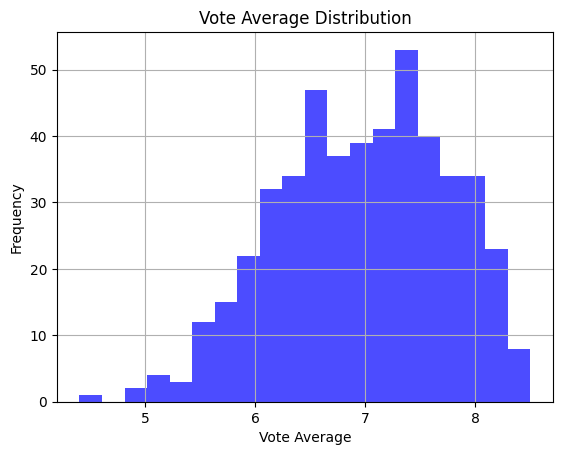

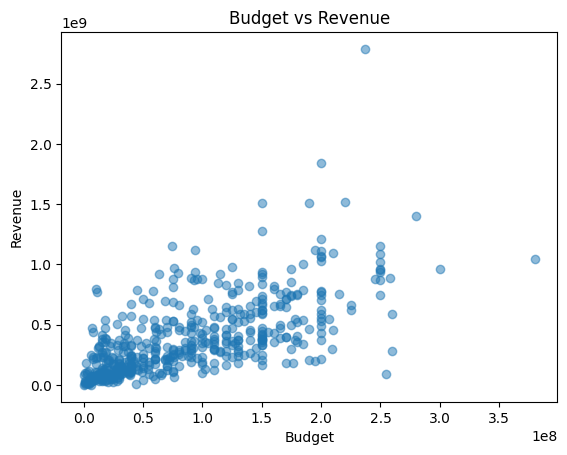

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution
qualifying_movies['vote_average'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Correlation scatter plot
plt.scatter(qualifying_movies['budget'], qualifying_movies['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Popular Movies')

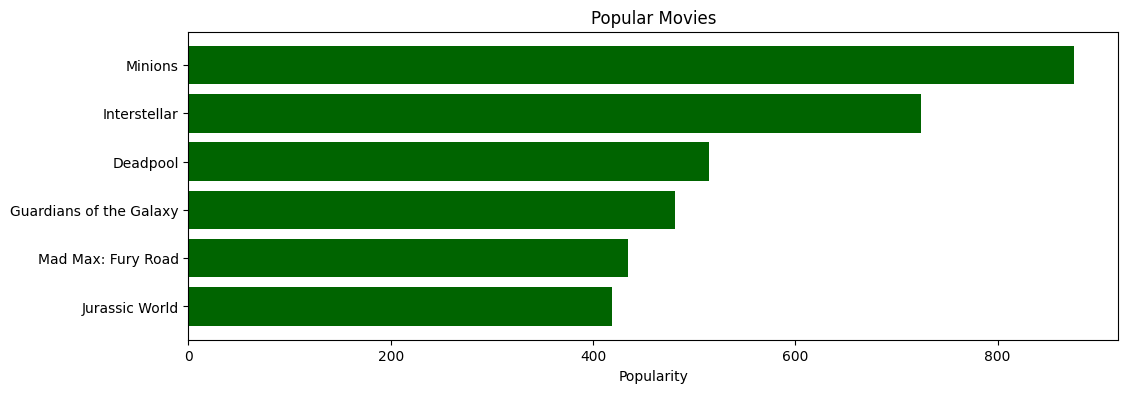

In [365]:
pop = df.sort_values('popularity', ascending=False)


plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center', color='darkgreen')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



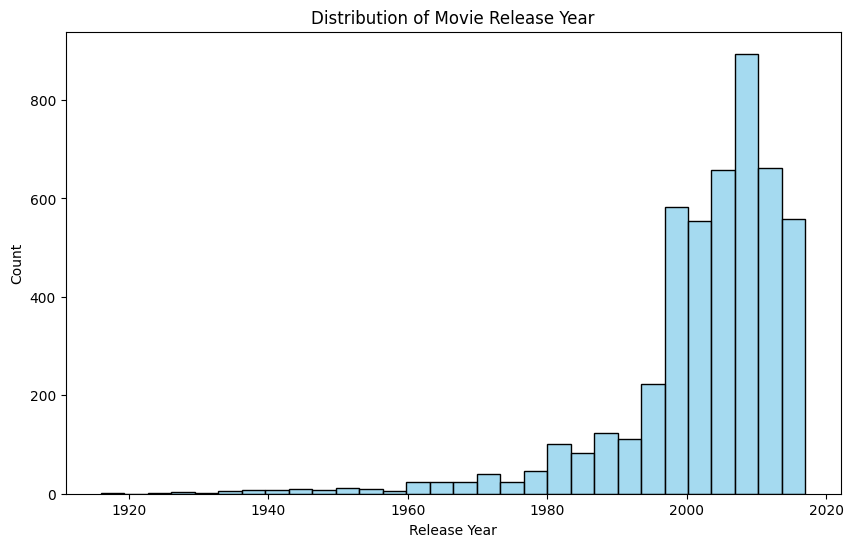

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Movie Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


In [367]:

most_movies_year = df['release_year'].value_counts().idxmax()
most_movies_count = df['release_year'].value_counts().max()

print(f"The year with the most movies is {most_movies_year} with {most_movies_count} movies.")


The year with the most movies is 2009.0 with 247 movies.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [368]:
df['genres'].head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [369]:
# Onehot encode the genres

from sklearn.preprocessing import MultiLabelBinarizer
import json

mlb = MultiLabelBinarizer()

def extract_genre(cast_list_str):
    name_list = json.loads(cast_list_str)
    return [genre['name'] for genre in name_list][0:1]

df['main_genre'] = df['genres'].apply(extract_genre)
genre_encoded = mlb.fit_transform(df['main_genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
genre_df.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [370]:
df['cast'].head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
Name: cast, dtype: object

In [371]:
# Onehot encode the casts

from sklearn.preprocessing import MultiLabelBinarizer
import json

mlb = MultiLabelBinarizer()

def extract_cast(cast_list_str):
    cast_list = json.loads(cast_list_str)
    main_cast = [str(cast['name']) for cast in cast_list if cast['order'] == 0]
    return main_cast

df['main_cast'] = df['cast'].apply(extract_cast)
cast_encoded = mlb.fit_transform(df['main_cast'])
cast_df = pd.DataFrame(cast_encoded, columns=mlb.classes_)

cast_df.head(3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,"""Weird Al"" Yankovic",50 Cent,AJ Michalka,Aamir Khan,Aaron Abrams,Aaron Eckhart,Aaron Kwok,Aaron Paul,Aaron Stanford,Aaron Taylor-Johnson,...,Zachary Gordon,Zachary Levi,Zana Marjanović,Zero Mostel,Zhang Ziyi,Zoe Kazan,Zoe Lister-Jones,Zoe Saldana,Zoe Sloane,Zooey Deschanel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4>Step 2: Similarity and Distance</h4>

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. We will compute the similarity using TF-IDF and Cosine similarity.

<em>To revise <a link="https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3">TF-IDF</a> and understanding what is behind the concept of computing Cosine Similarity with TF-IDF Features means comparing the textual similarity between two pieces of text based on their semantic content. </em>
<ul>
    <li>The TF-IDF vectorizer converts a collection of text (like movie overviews) into numerical vectors.</li>
    <li>Each vector represents the importance of specific words in the text, considering how frequently they appear across all documents.</li>
    <li>By calculating the cosine similarity between TF-IDF vectors, we measure how "similar" the textual descriptions are, despite differences in exact wording.</li>

</ul>

In [372]:
df['overview'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer

# stop_words is for removing all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['overview'])

tfidf_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(4803, 20978)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



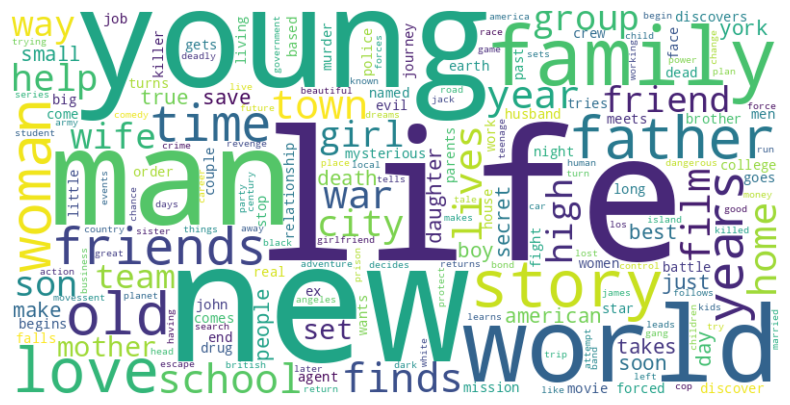

In [374]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

feature_names = tfidf.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
word_scores = dict(zip(feature_names, tfidf_scores))

# the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


$$ \text{Cosine similarity} = \frac {A \cdot B}{\|{A}\| \cdot \|{B}\| } = \frac {\sum_{i=1}^n A_i B_i}{\sqrt{\sum_{i=1}^n A_i^2} \sqrt{\sum_{i=1}^n B_i^2}} $$

I have found out that the TF-IDF vectorizer provided by scikit-learn automatically normalizes each vector to unit length (L2 norm) during transformation. Hence, the denominator in the cosine similarity formula becomes redundant, so using linear_kernel will give us the dot product which is same as computing Cosine Similarity but simplyfing, in this case.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



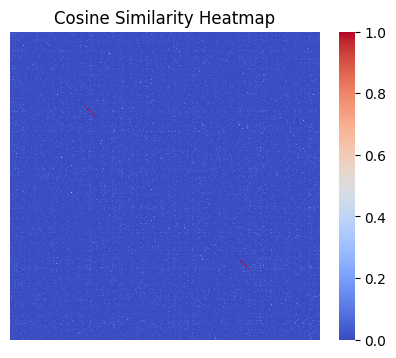

In [375]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

plt.figure(figsize=(5, 4))
sns.heatmap(cosine_sim, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap')
plt.show()

In [415]:
cosine_sim.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(4803, 4803)

<h4>Step 3: Recommendation System"</h4>


<h5>Step 3.1 Content-based Recommendation Systems</h5>
The below is a function that takes a movie title as an input and returns 10 top most similar movies to the given titled movie

In [376]:
def get_top_n_sim_movies(title, cosine_sim=cosine_sim, n=10):
    idx = list(df.index[df['title']==title])
    simi_movies = list(enumerate(cosine_sim[idx[0]])) # idx is returned as a list!
    simi_scores = sorted(simi_movies, key=lambda x: x[1], reverse=True)[1:n+1]
    simi_indices = [i[0] for i in simi_scores]
    return df['title'].iloc[simi_indices]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [377]:
title  = 'Avatar'
print(get_top_n_sim_movies(title, cosine_sim))

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<!-- <h4>Step 3.2 Collaborative Filtering </h4> 

To estimate the rating for a user-item pair (𝑢, 𝑖):
<ul>
    <li>
        Find the set 𝑇𝑜𝑝𝐾𝑖(𝑢) of the 𝐾 most similar users to 𝑢 who have rated
item 𝑖. 
    </li>
    <li>Estimate 𝑢’s ratings for item 𝑖, by aggregating the ratings of users in
𝑇𝑜𝑝𝐾</li>
</ul>

$$
\hat{r}_{ui} = \bar{r}_{u} + \frac{1}{Z} \sum_{v \in \text{Top K}_{i}(u)} \text{sim}(u, v) \cdot (r_{vi} - \bar{r}_{v})
$$ -->

<h4>Step 4: Classification Models</h4>

Let's perform regression on revenue feature.


In [386]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


threshold = df['revenue'].median() 
df['high_revenue'] = (df['revenue'] >= threshold).astype(int) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [387]:
df['budget'].fillna(df['budget'].median(), inplace=True)
df['runtime'].fillna(df['runtime'].median(), inplace=True)

df.dropna(subset=['revenue'], inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [388]:
df['weighted_rating'] = ((v/(v+m))*R+(m/(v+m))*C) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [389]:
# Onehot encode the genres

from sklearn.preprocessing import MultiLabelBinarizer
import json

mlb = MultiLabelBinarizer()

def extract_casts(cast_list_str):
    name_list = json.loads(cast_list_str)
    return [genre['name'] for genre in name_list][0:1]

df['main_genre'] = df['genres'].apply(extract_genre)
genre_encoded = mlb.fit_transform(df['main_genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

df_b = pd.concat([df, genre_df], axis=1)
df_b['main_genre'].head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0       [Action]
1    [Adventure]
2       [Action]
3       [Action]
4       [Action]
Name: main_genre, dtype: object

In [390]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew', 'release_year', 'main_genre',
       'main_cast', 'keys', 'combined_features', 'combined_features2',
       'high_revenue', 'weighted_rating'],
      dtype='object')

In [392]:
features = ['budget', 'popularity', 'runtime', 'weighted_rating', 'vote_count']
temp = df.copy() 

temp = temp.drop(columns=['high_revenue']) 

X = temp[features]
y = df['high_revenue'] 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [397]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)


log_accuracy = log.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.8522372528616025


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

In [394]:
from sklearn.metrics import classification_report

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.23      0.37       491
           1       0.55      1.00      0.71       470

    accuracy                           0.61       961
   macro avg       0.78      0.61      0.54       961
weighted avg       0.78      0.61      0.54       961



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

In [398]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  
svm_clf.fit(X_train_scaled, y_train)

svm_accuracy = svm_clf.score(X_test_scaled, y_test)
print(f"SVM Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

SVM Accuracy: 0.8522372528616025


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

In [396]:
from sklearn.metrics import classification_report

y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       491
           1       0.49      1.00      0.66       470

    accuracy                           0.49       961
   macro avg       0.24      0.50      0.33       961
weighted avg       0.24      0.49      0.32       961



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecat

In [399]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


rf_accuracy = rf_clf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

Random Forest Accuracy: 0.8522372528616025


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Ch

In [400]:
from sklearn.metrics import classification_report

y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       491
           1       0.84      0.89      0.86       470

    accuracy                           0.86       961
   macro avg       0.86      0.86      0.86       961
weighted avg       0.86      0.86      0.86       961



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



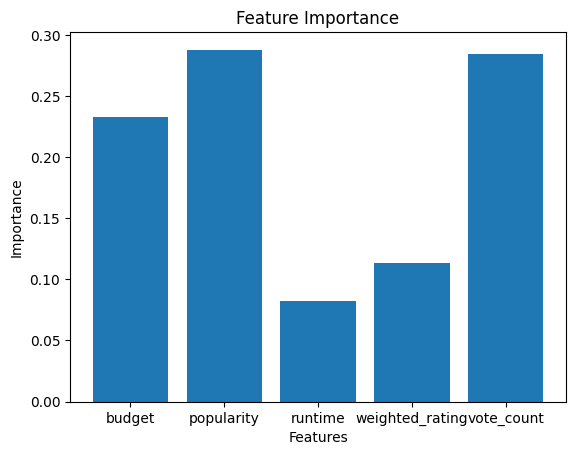

In [401]:
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



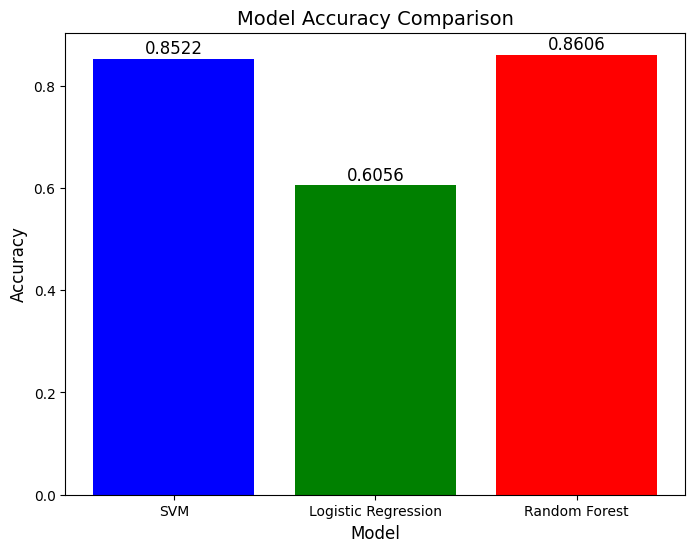

In [404]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracies = [svm_accuracy, log_accuracy, rf_accuracy]
models = ['SVM', 'Logistic Regression', 'Random Forest']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontsize=12)

# Show the plot
plt.show()


<h4>Step 5: Clustering</h4>

<h5>Step 5.1 DBScan</h5>

In [405]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5) 
genre_clusters = db.fit_predict(genre_df)

df_b['genre_cluster'] = genre_clusters
print(df_b[['main_genre', 'genre_cluster']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

         main_genre  genre_cluster
0          [Action]              0
1       [Adventure]              1
2          [Action]              0
3          [Action]              0
4          [Action]              0
...             ...            ...
4798       [Action]              0
4799       [Comedy]              8
4800       [Comedy]              8
4801             []             18
4802  [Documentary]             16

[4803 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



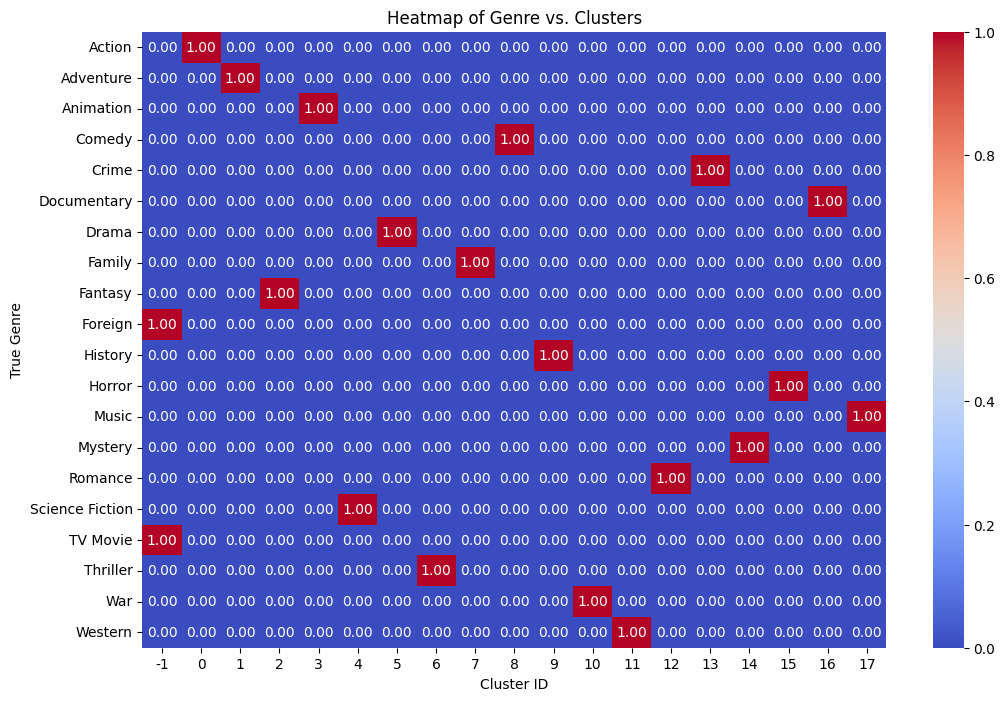

In [406]:
df_exploded = df_b.explode('main_genre')

genre_cluster_matrix = pd.crosstab(df_exploded['main_genre'], df_exploded['genre_cluster'], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(genre_cluster_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Genre vs. Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('True Genre')
plt.show()

<h5>Step 5.2: Gaussian Mixture Models (GMM)</h5>
Cluster movie genres with GMM

In [407]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=20, random_state=42)  # Adjust n_components as needed
genre_clusters = gmm.fit_predict(genre_df)

# Assign cluster labels to the DataFrame
df_b['gmm_cluster'] = genre_clusters

# Display the resulting clusters
print(df_b[['main_genre', 'gmm_cluster']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:1814: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/pa

         main_genre  gmm_cluster
0          [Action]            3
1       [Adventure]            4
2          [Action]            3
3          [Action]            3
4          [Action]            3
...             ...          ...
4798       [Action]            3
4799       [Comedy]            1
4800       [Comedy]            1
4801             []           11
4802  [Documentary]           12

[4803 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



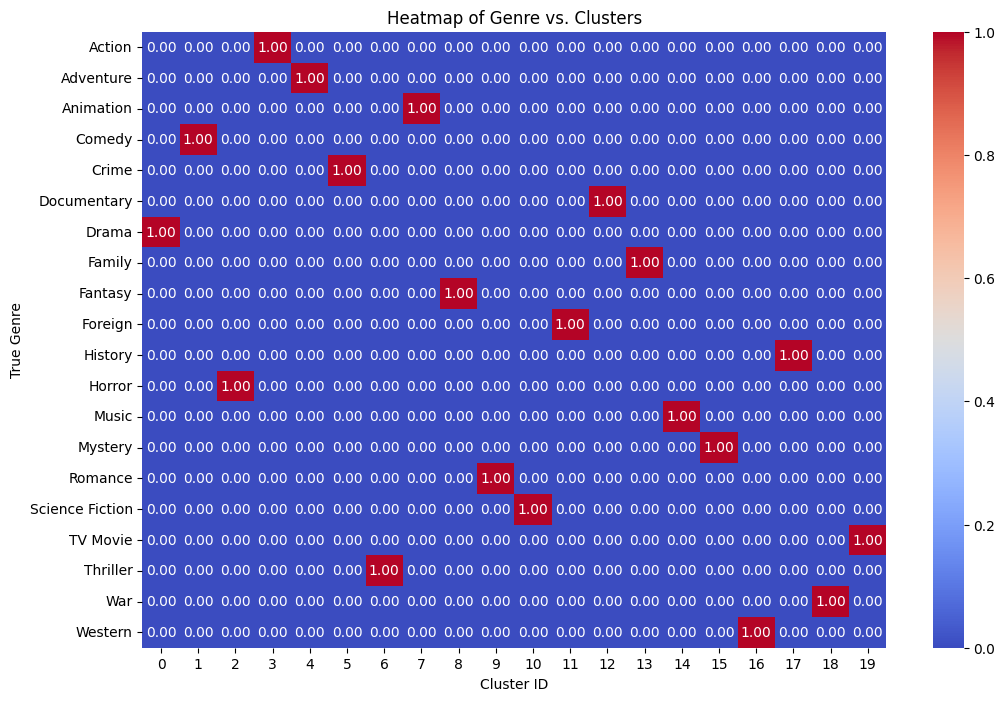

In [408]:
df_b[['main_genre', 'gmm_cluster']]

df_exploded = df_b.explode('main_genre')

genre_cluster_matrix = pd.crosstab(df_exploded['main_genre'], df_exploded['gmm_cluster'], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(genre_cluster_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Genre vs. Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('True Genre')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



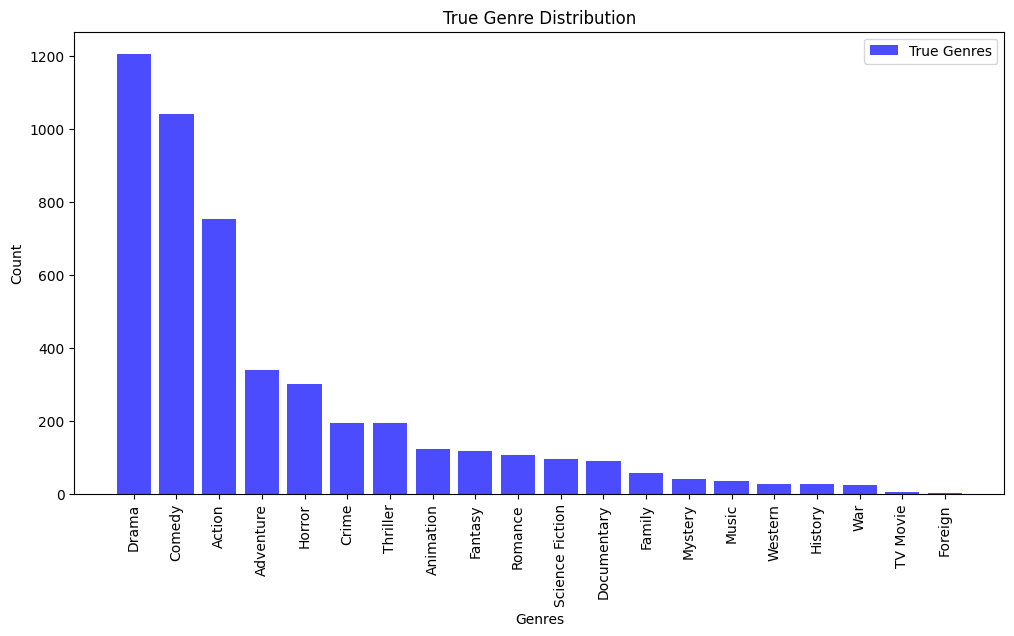

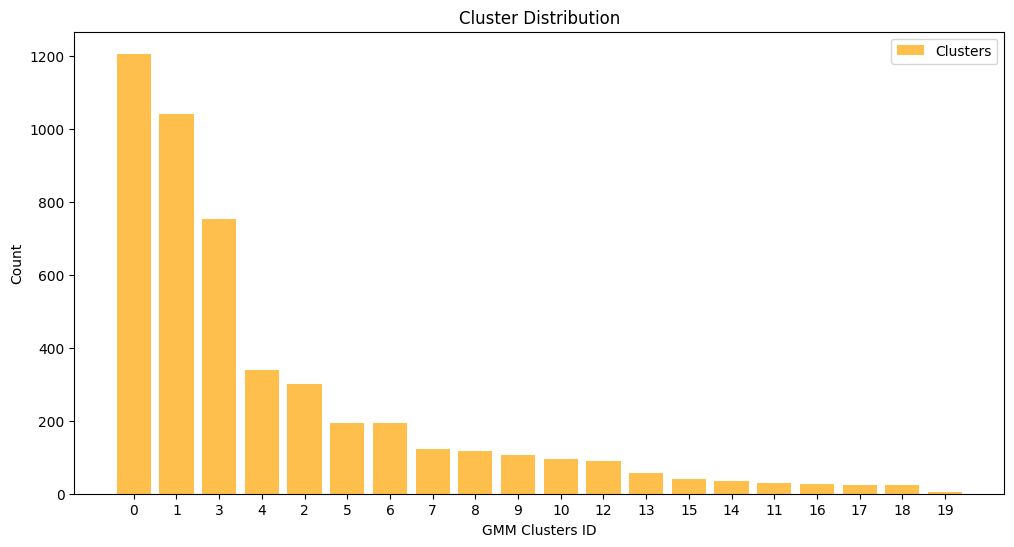

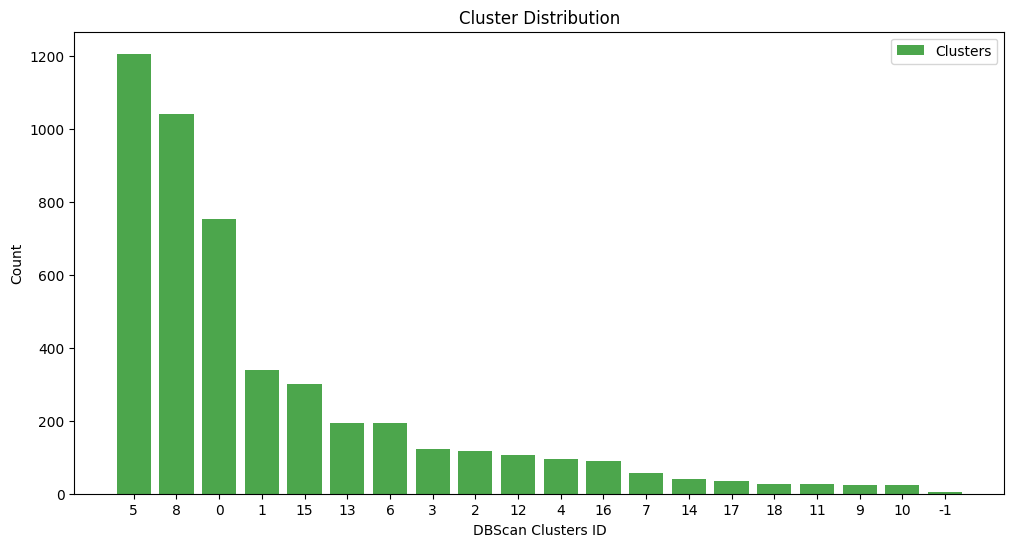

In [409]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count true genres
true_genre_counts = df_b['main_genre'].explode().value_counts()

# Count clusters
gmm = df_b['gmm_cluster'].value_counts()
dbscan =  df_b['genre_cluster'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(true_genre_counts.index, true_genre_counts.values, color='blue', alpha=0.7, label='True Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('True Genre Distribution')
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(gmm.index.astype(str), gmm.values, color='orange', alpha=0.7, label='Clusters')
plt.xlabel('GMM Clusters ID')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(dbscan.index.astype(str), dbscan.values, color='green', alpha=0.7, label='Clusters')
plt.xlabel('DBScan Clusters ID')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.legend()
plt.show()


<h4>Step 6: Association Rules</h4>

In [410]:
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

mlb = MultiLabelBinarizer()

def extract_genre(cast_list_str):
    name_list = json.loads(cast_list_str)
    
    return [genre['name'] for genre in name_list]

df['genre_encoded'] = df['genres'].apply(extract_genre)
genre_encoded = mlb.fit_transform(df['genre_encoded'])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

df_c = pd.concat([df, genre_encoded_df], axis=1)

# TransactionEncoder 
genre_list = df_c['genre_encoded'].apply(lambda x: x if isinstance(x, list) else []).tolist()
te = TransactionEncoder()
te_ary = te.fit(genre_list).transform(genre_list)
df_genre = pd.DataFrame(te_ary, columns=te.columns_)

# apriori algorithm
frequent_itemsets = apriori(df_genre, min_support=0.05, use_colnames=True)

# association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print(rules)


          antecedents        consequents  antecedent support  \
0            (Action)        (Adventure)            0.240267   
1         (Adventure)           (Action)            0.164481   
2            (Action)            (Crime)            0.240267   
3             (Crime)           (Action)            0.144909   
4   (Science Fiction)           (Action)            0.111389   
5            (Action)  (Science Fiction)            0.240267   
6            (Action)         (Thriller)            0.240267   
7          (Thriller)           (Action)            0.265251   
8            (Comedy)           (Family)            0.358526   
9            (Family)           (Comedy)            0.106808   
10           (Comedy)          (Romance)            0.358526   
11          (Romance)           (Comedy)            0.186134   
12            (Crime)         (Thriller)            0.144909   
13         (Thriller)            (Crime)            0.265251   
14          (Romance)            (Drama)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [414]:
frequent_itemsets.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(27, 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



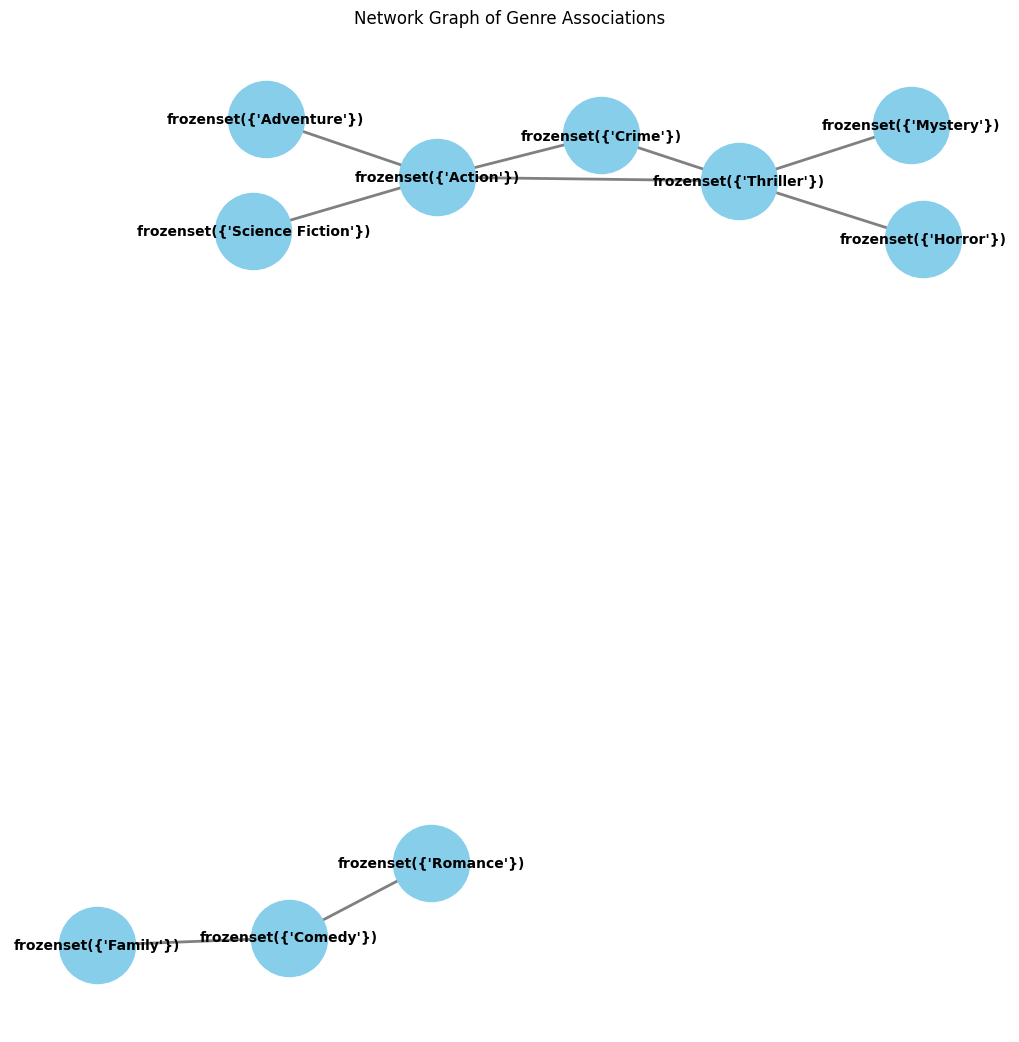

In [411]:
import networkx as nx

G = nx.Graph()

for _, rule in rules.iterrows():
    if rule['lift'] > 1.5:
        G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['lift'])

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray', width=2)
plt.title('Network Graph of Genre Associations')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



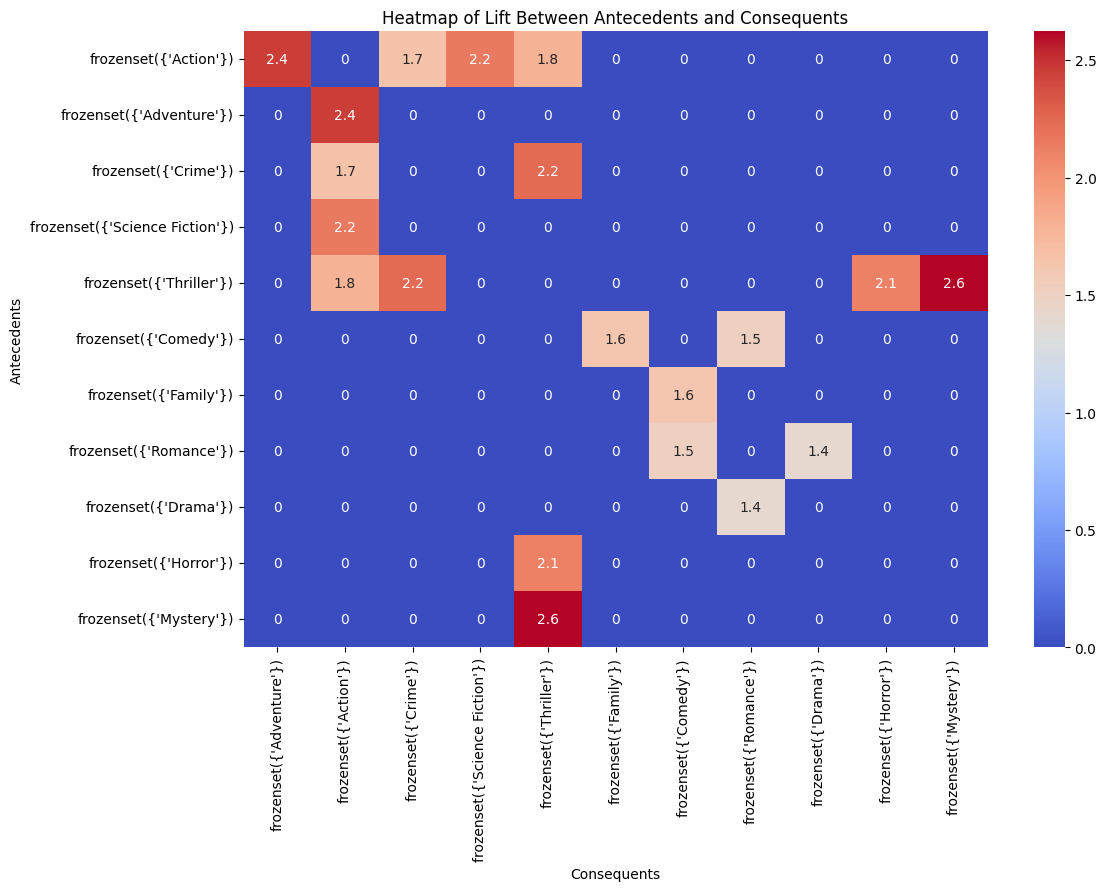

In [412]:
import seaborn as sns

# Create a pivot table to form the heatmap
heatmap_data = pd.pivot_table(rules, values='lift', index='antecedents', columns='consequents', aggfunc='mean', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Lift Between Antecedents and Consequents')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()
